In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('data\mitbih_train.csv',header=None)
test_df=pd.read_csv('data\mitbih_test.csv',header=None)

In [3]:
train_df[187].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [4]:
print('Train Data Shape:', train_df.shape, '\nTest Data Shape:', test_df.shape)

Train Data Shape: (87554, 188) 
Test Data Shape: (21892, 188)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [7]:
categories_train = train_df[187].value_counts()

In [8]:
print(categories_train)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [9]:
categories_test = test_df[187].value_counts()
print(categories_test)

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [10]:
#change the label type from float to integer
train_df[187] = train_df[187].astype(int)
test_df[187] = test_df[187].astype(int)

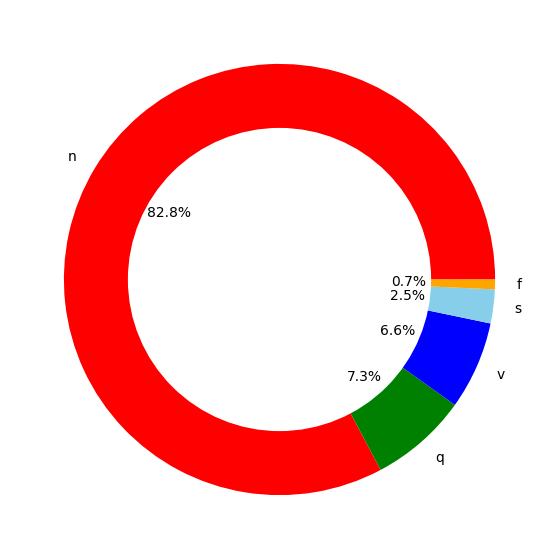

In [11]:
plt.figure(figsize=(10,7))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(categories_train, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [12]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=126)



train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [13]:
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1     5000
2     5000
3     5000
4     5000
Name: count, dtype: int64


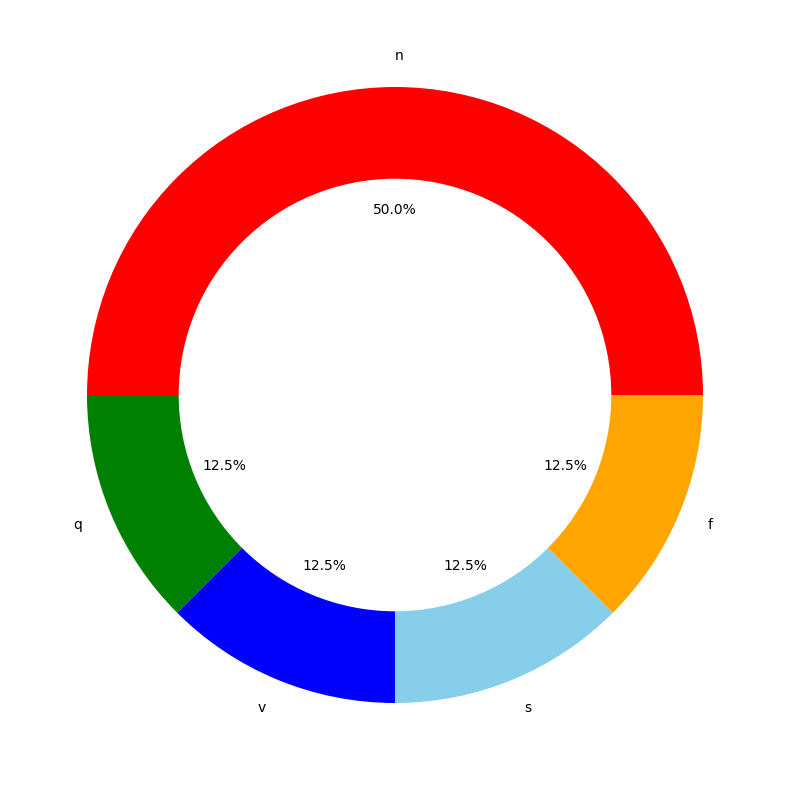

In [14]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Adding Noise

In [20]:
def add_gaussian_noise(signal):
    noise = np.random.normal(0, 0.5, 186)
    return np.array(signal + noise)

def preprocess_data(train_df, test_df):
    y_train = train_df[187]
    y_test = test_df[187]

    X_train = train_df.iloc[:, :186].values
    X_test = test_df.iloc[:, :186].values

    for i in range(len(X_train)):
        X_train[i, :186] = add_gaussian_noise(X_train[i, :186])

    X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
    X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)

    return X_train, y_train, X_test, y_test

# Preprocess data
X_train, y_train, X_test, y_test = preprocess_data(train_df, test_df)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# SVM (LinearSVC) Pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC())
])

# Train and evaluate SVM model
svm_pipeline.fit(X_train.squeeze(), y_train)
svm_accuracy = svm_pipeline.score(X_test.squeeze(), y_test)
print("SVM Accuracy:", svm_accuracy)


KeyboardInterrupt: 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Train and evaluate Random Forest model
rf_pipeline.fit(X_train.squeeze(), y_train)
rf_accuracy = rf_pipeline.score(X_test.squeeze(), y_test)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8660241183994153


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Train and evaluate Logistic Regression model
logreg_pipeline.fit(X_train.squeeze(), y_train)
logreg_accuracy = logreg_pipeline.score(X_test.squeeze(), y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)


Logistic Regression Accuracy: 0.8477982824776173


In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    if hasattr(model, "decision_function"):
        # SVM
        y_pred = model.decision_function(X_test)
    else:
        # Random Forest or Logistic Regression
        y_pred = model.predict_proba(X_test)[:, 1]

    # Binarize predictions
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# # Evaluate SVM model
# print("SVM Evaluation:")
# evaluate_model(svm_pipeline, X_test.squeeze(), y_test)

# # Evaluate Random Forest model
# print("Random Forest Evaluation:")
# evaluate_model(rf_pipeline, X_test.squeeze(), y_test)

# Evaluate Logistic Regression model
print("Logistic Regression Evaluation:")
evaluate_model(logreg_pipeline, X_test.squeeze(), y_test)


In [25]:
def evaluate_model(model, X_test, y_test):
    # Print accuracy
    accuracy = model.score(X_test, y_test)
    print("Accuracy: %.2f%%" % (accuracy * 100))
    
    # Confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Logistic Regression Evaluation:
Accuracy: 84.78%


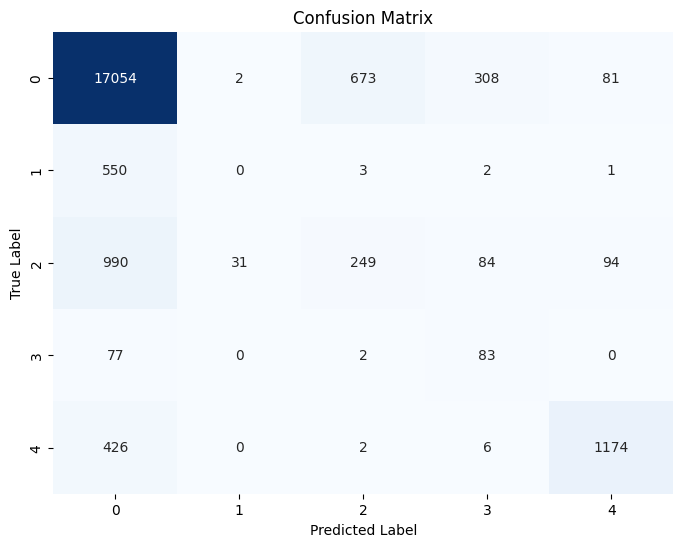

In [26]:
# Evaluate Logistic Regression model
print("Logistic Regression Evaluation:")
evaluate_model(logreg_pipeline, X_test.squeeze(), y_test)